In [125]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [153]:
# Load the data from Covidtracking
us_df = pd.read_csv('https://covidtracking.com/api/us/daily.csv', index_col=0)

In [154]:
us_df.head(5)

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200408,56,423164,1766602,17228,40298.0,47159.0,9702.0,1013.0,4073.0,216.0,...,14495,47159.0,2206994,2189766,2189766,1874.0,1579.0,104734.0,30570.0,135304.0
20200407,56,392594,1661868,16557,39011.0,45580.0,9649.0,889.0,4007.0,233.0,...,12621,45580.0,2071019,2054462,2054462,1941.0,730.0,114842.0,31263.0,146105.0
20200406,56,361331,1547026,17292,30237.0,44850.0,6607.0,816.0,2921.0,187.0,...,10680,44850.0,1925649,1908357,1908357,1182.0,3788.0,117302.0,29023.0,146325.0
20200405,56,332308,1429724,17307,27061.0,41062.0,5497.0,762.0,612.0,193.0,...,9498,41062.0,1779339,1762032,1762032,1184.0,2851.0,111132.0,26553.0,137685.0
20200404,56,305755,1318592,15573,26158.0,38211.0,5207.0,587.0,656.0,193.0,...,8314,38211.0,1639920,1624347,1624347,1352.0,4071.0,193718.0,33767.0,227485.0


In [155]:
us_df = us_df.reset_index()
us_df.date = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df.set_index('date').sort_index()
us_df = us_df.reset_index()
us_df = us_df[['date','positive', 'negative', 'pending', 'death', 'total']]

In [164]:
us_df.head(15)

,date,positive,negative,pending,death,total
0,2020-03-04,118,748,103,10,969
1,2020-03-05,176,953,197,11,1326
2,2020-03-06,223,1571,458,14,2252
3,2020-03-07,341,1809,602,16,2752
4,2020-03-08,417,2335,347,18,3099
5,2020-03-09,584,3367,313,22,4264
6,2020-03-10,778,3807,469,24,5054
7,2020-03-11,1054,6070,563,27,7687
8,2020-03-12,1315,8041,673,36,10029
9,2020-03-13,1922,13613,1130,39,16665


In [157]:
us_df.dtypes

date        datetime64[ns]
positive             int64
negative             int64
pending              int64
death                int64
total                int64
dtype: object

In [165]:
df_avg2 = us_df.rolling(2, win_type='triang').sum().round()
# Pass the row elements as key value pairs to append() function 
df_avg2.iloc[0] = [118, 748, 103, 10, 969]
df_avg2.head(5)

,positive,negative,pending,death,total
0,118.0,748.0,103.0,10.0,969.0
1,147.0,850.0,150.0,10.0,1148.0
2,200.0,1262.0,328.0,12.0,1789.0
3,282.0,1690.0,530.0,15.0,2502.0
4,379.0,2072.0,474.0,17.0,2926.0


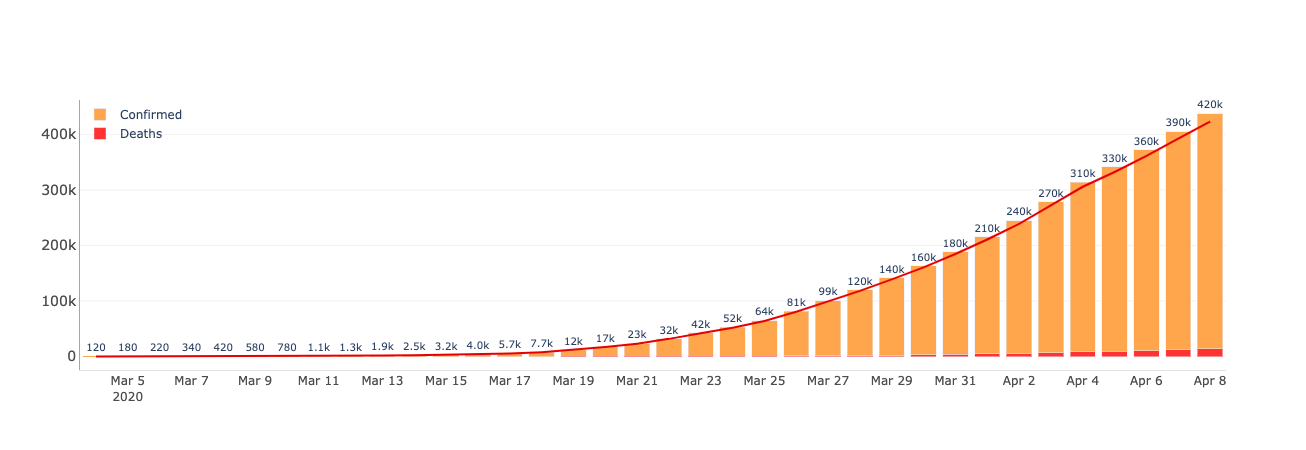

In [172]:
import plotly.graph_objects as go

con = us_df['positive']
dea = us_df['death']

fig = go.Figure()

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['death'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333'     
                    )
             )

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['positive'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d'
                    )
             )

fig.update_layout(barmode='stack',
                  paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor='rgba(0,0,0,0)',
                  uniformtext_minsize=6, uniformtext_mode='hide',
                  hovermode='x', #sets the bar chart to display both tooltips by default
                  legend=dict(x=0, y=1),
                  #font=dict(size = 12),
                  dragmode=False, #disable panning so mobile apps can receive pinch to zoom events
                  yaxis = dict(
                      scaleanchor = "x",
                      scaleratio = 1,
                              )
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='#a6a6a6', color='#4d4d4d',
                #showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                fixedrange=True,
                #tickfont = dict(size = 10),
                tickmode='auto',
                nticks=26
                )
              
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                 fixedrange=True,
                 tickfont = dict(size = 14),
                )


fig.update_traces(texttemplate='%{y:,.2s}', textposition='outside')


    
fig.add_trace(go.Scatter(x = us_df['date'], y = us_df['positive'],
                    mode='lines',
                    name='',
                    line=dict(color='#e60000', width=2),
                    showlegend=False,
                    hoverinfo='skip'
                        )
             )


fig.show(displayModeBar=False)
    
import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)